In [1]:
from model import *
from utils import *

In [2]:
device = get_device()
print(device)

cuda


In [3]:
train_transforms = get_transforms(train=True)
test_transforms = get_transforms(train=False)

print(train_transforms, test_transforms)

Compose(
    RandomApply(
    p=0.1
    CenterCrop(size=(22, 22))
)
    Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=None)
    RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
    ToTensor()
    Normalize(mean=(0.1307,), std=(0.3081,))
) Compose(
    ToTensor()
    Normalize(mean=(0.1307,), std=(0.3081,))
)


In [4]:
train_data = get_mnist_data(train=True, transforms=train_transforms)
test_data = get_mnist_data(train=False, transforms=test_transforms)

In [5]:
hyperparams = get_hyperparams(512)
print(hyperparams)

{'batch_size': 512, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}


In [6]:
train_loader = get_dataloader(train_data, hyper_params=hyperparams)
test_loader = get_dataloader(test_data, hyper_params=hyperparams)

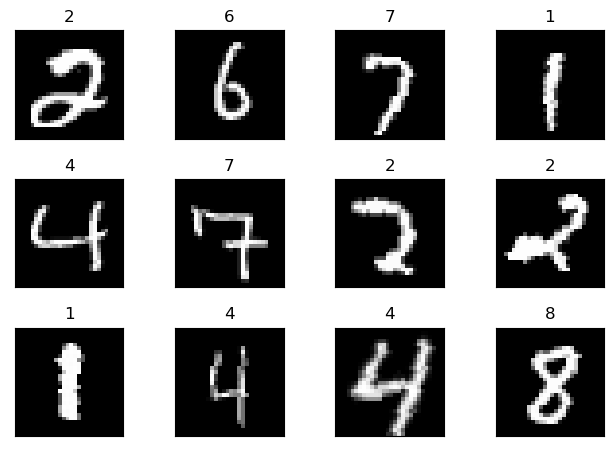

In [7]:
plot_sample(train_loader)

In [8]:
model = Net().to(device=device)

In [9]:
loss = get_loss()
optimizer, scheduler = get_optimizer(model, lr=0.01, momentum=0.9)

Adjusting learning rate of group 0 to 1.0000e-02.


In [10]:
trainer = Trainer(model=model)

In [11]:
num_epochs = 5

for epoch in range(1, num_epochs+1):
    print(f"Epoch {epoch}")
    trainer.train(device, train_loader=train_loader,
                        criterion=loss, optimizer=optimizer, epoch=epoch)
    trainer.test(device, test_loader, loss)
    scheduler.step()

Epoch 1


Train: Loss=0.3329 Batch_id=117 Accuracy=53.04: 100%|██████████| 118/118 [00:10<00:00, 11.49it/s]



Test set: Average loss: 0.0004, Accuracy: 9381/10000 (93.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1102 Batch_id=117 Accuracy=94.22: 100%|██████████| 118/118 [00:07<00:00, 15.31it/s]



Test set: Average loss: 0.0002, Accuracy: 9731/10000 (97.31%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1089 Batch_id=117 Accuracy=96.49: 100%|██████████| 118/118 [00:07<00:00, 15.40it/s]



Test set: Average loss: 0.0001, Accuracy: 9804/10000 (98.04%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1429 Batch_id=117 Accuracy=97.03: 100%|██████████| 118/118 [00:07<00:00, 15.55it/s]



Test set: Average loss: 0.0001, Accuracy: 9825/10000 (98.25%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0434 Batch_id=117 Accuracy=97.56: 100%|██████████| 118/118 [00:07<00:00, 15.39it/s]



Test set: Average loss: 0.0001, Accuracy: 9865/10000 (98.65%)

Adjusting learning rate of group 0 to 1.0000e-02.


In [12]:
train_loss, train_acc, test_loss, test_acc = trainer.get_stats()

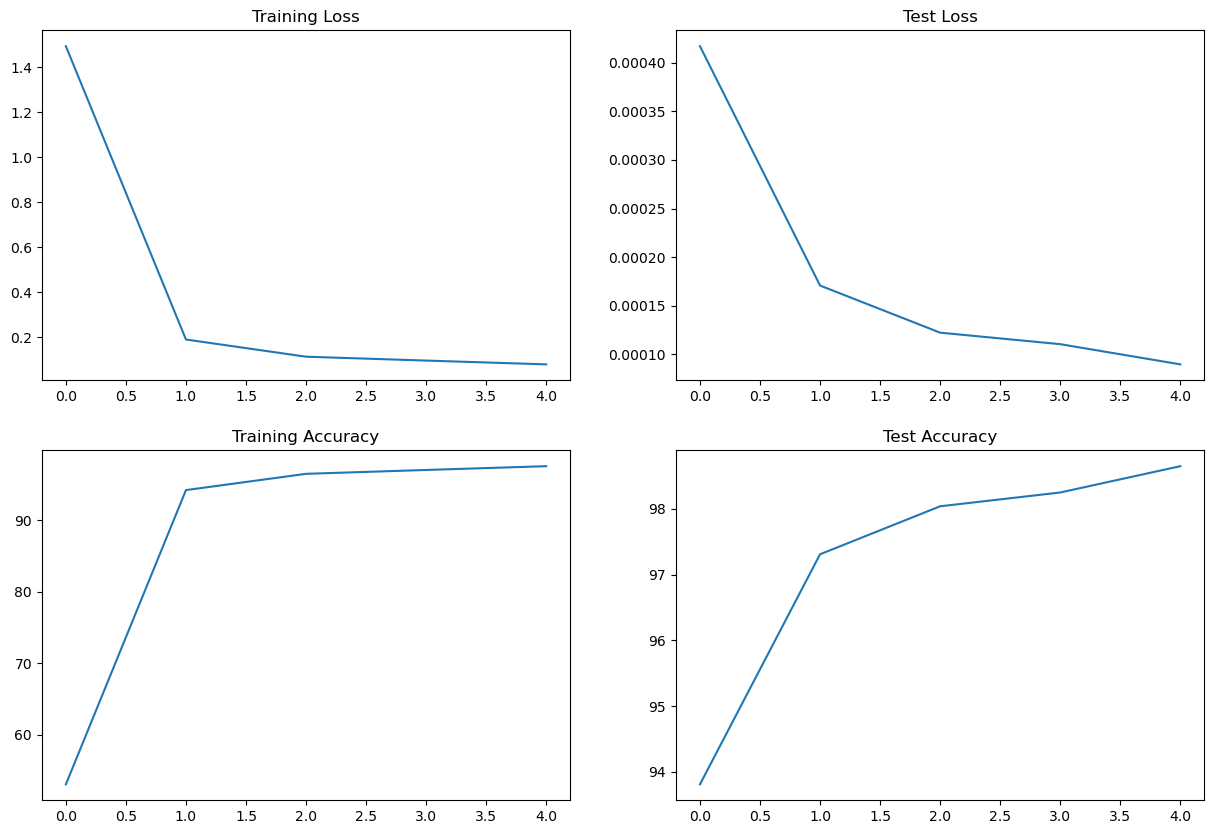

In [13]:
trainer.plot_metrics()